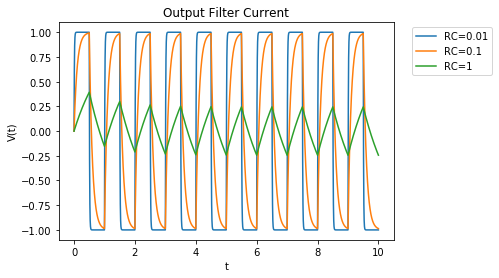

In [15]:
#Exercise 8.1
from scipy import floor, arange, empty
import matplotlib.pyplot as plt

# Solve Vout'(t) = 1 / (RC) * (V_in - V_out) using 4-th order Runge-Kutta

# Constants
V_out_0 = 0
t_initial = 0
t_final = 10
N = 5000  # number of points to use
h = (t_final - t_initial) / N  # step size

def V_in(t):
    if floor(2 * t) % 2 == 0:
        return 1
    else:
        return -1


def f(V, t, RC):
    return 1 / RC * (V_in(t) - V)


def g(RC):
    tpoints = arange(t_initial, t_final, h)
    Vpoints = []
    V = V_out_0
    for t in tpoints:
        Vpoints.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5 * k1, t + 0.5 * h, RC)
        k3 = h * f(V + 0.5 * k2, t + 0.5 * h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return Vpoints


t = arange(t_initial, t_final, h)
plt.plot(t, g(0.01), label ='RC=0.01')
plt.plot(t, g(0.1), label ='RC=0.1')
plt.plot(t, g(1), label ='RC=1')
plt.xlabel('t')
plt.ylabel('V(t)')
plt.title('Output Filter Current')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# The cutoff frequency is given by 1 / (2*pi*RC)

The graph shows three oscillating plots of the output of the filter current from t=0 to t=10 with RC=0.01, RC=0.1, and RC=1. The amplitudes of the graph seems to decrease with increasing RC. 